In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [ ]:
# 1) 한글 폰트 설치 (Nanum + Noto CJK KR 백업)
!apt-get update -qq
!apt-get install -y fonts-nanum fonts-noto-cjk > /dev/null

# 2) Matplotlib에 폰트 즉시 등록(재시작 불필요) + 전역 설정
import os, glob
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm

# 설치된 폰트 경로에서 ttf/otf 파일을 찾아 등록
font_dirs = [
    "/usr/share/fonts/truetype/nanum",
    "/usr/share/fonts/opentype/noto",
    "/usr/share/fonts/noto",
]
font_files = []
for d in font_dirs:
    if os.path.isdir(d):
        font_files += glob.glob(os.path.join(d, "**", "*.ttf"), recursive=True)
        font_files += glob.glob(os.path.join(d, "**", "*.otf"), recursive=True)

for f in font_files:
    try:
        fm.fontManager.addfont(f)
    except Exception:
        pass  # 읽지 못하는 폰트 파일은 건너뜀

# 선호 순서대로 사용할 폰트 이름 선택
preferred = [
    "NanumBarunGothic",  # 있으면 이걸 최우선
    "NanumGothic",
    "Noto Sans CJK KR",
    "Noto Sans KR",
    "NanumMyeongjo",
]
available = {f.name for f in fm.fontManager.ttflist}
font_name = next((name for name in preferred if name in available), None)

if font_name is None:
    raise RuntimeError("Korean font not found — 설치가 실패했을 수 있어요.")

mpl.rcParams["font.family"] = font_name
mpl.rcParams["axes.unicode_minus"] = False
print("Using font:", font_name)

# 3) 간단 테스트 플롯 (한글이 보이면 성공)
plt.figure()
plt.title("한글 제목 테스트 — 정상 동작하면 글자가 보입니다")
plt.plot([1, 2, 3], [1, 4, 9], marker="o")
plt.xlabel("가로축")
plt.ylabel("세로축")
plt.text(2, 7, "✅ 한글 OK, 마이너스 기호 OK: -1", ha="center")
plt.show()


# [빅밸류 플랫폼](https://bigvalue.ai/)

**계정신청은 수업 공지 확인**

In [ ]:
!wget "https://hycms.hanyang.ac.kr/index.php?module=xn_media_content2013&act=dispXn_media_content2013DownloadContent&content_id=68c673e9ec479" -O "apt_real.xlsx"

In [ ]:
data = pd.read_excel('apt_real.xlsx',  dtype='str')
data

In [ ]:
data.dtypes

In [ ]:
data['거래금액(만원)'] = data['거래금액(만원)'].str.replace(',', '')
data['거래금액(만원)'] = data['거래금액(만원)'].astype('int')
data.dtypes

In [ ]:
data = data.rename(columns={'거래금액(만원)' : '거래가'})
data.dtypes

In [ ]:
data['거래가'].describe()

In [ ]:
data['거래가'].hist(bins=100)
plt.show()

# **전체 실거래 데이터를 대표하는 값은 ?**
# .
# .
# .
# .
# .




In [ ]:
# 아파트 이름과 평형대를 조합하여 x축 라벨 생성
data['아파트정보'] = data['단지명'] + ' (' + data['전용면적(㎡)'] + '㎡)'

# 거래가를 기준으로 데이터를 내림차순 정렬
sorted_data = data.sort_values(by='거래가', ascending=False)

# 막대 그래프 그리기
plt.figure(figsize=(15, 7)) # 그래프 크기 설정
plt.bar(sorted_data['아파트정보'], sorted_data['거래가'])

# x축 라벨 회전 (겹치지 않도록)
plt.xticks(rotation=90, ha='right')

# 그래프 제목 및 축 레이블 설정
plt.title('아파트 단지별 거래가 (면적 포함, 가격 내림차순)')
plt.xlabel('단지명 (면적)')
plt.ylabel('거래가 (만원)')

# 레이아웃 조정
plt.tight_layout()

# 그래프 표시
plt.show()

In [ ]:
# 아파트 이름과 평형대를 조합하여 x축 라벨 생성
data['아파트정보'] = data['단지명'] + ' (' + data['전용면적(㎡)'] + '㎡)'

# 거래가를 기준으로 데이터를 내림차순 정렬
sorted_data = data.sort_values(by='거래가', ascending=False)

# 막대 그래프 그리기
plt.figure(figsize=(15, 7)) # 그래프 크기 설정
plt.bar(sorted_data['아파트정보'], sorted_data['거래가'], alpha=0.7) # alpha를 조절하여 색깔 흐릿하게 만듬

# 평균값과 중앙값 계산
mean_value = data['거래가'].mean()
median_value = data['거래가'].median()

# 평균값과 중앙값을 수평 점선으로 표시
plt.axhline(mean_value, color='red', linestyle='--', label='Mean')
plt.axhline(median_value, color='green', linestyle='--', label='Median')


# x축 라벨 회전 (겹치지 않도록)
plt.xticks(rotation=90, ha='right')

# 그래프 제목 및 축 레이블 설정
plt.title('아파트 단지별 거래가 (면적 포함, 가격 내림차순)')
plt.xlabel('단지명 (면적)')
plt.ylabel('거래가 (만원)')

# 범례 표시
plt.legend()

# 레이아웃 조정
plt.tight_layout()

# 그래프 표시
plt.show()

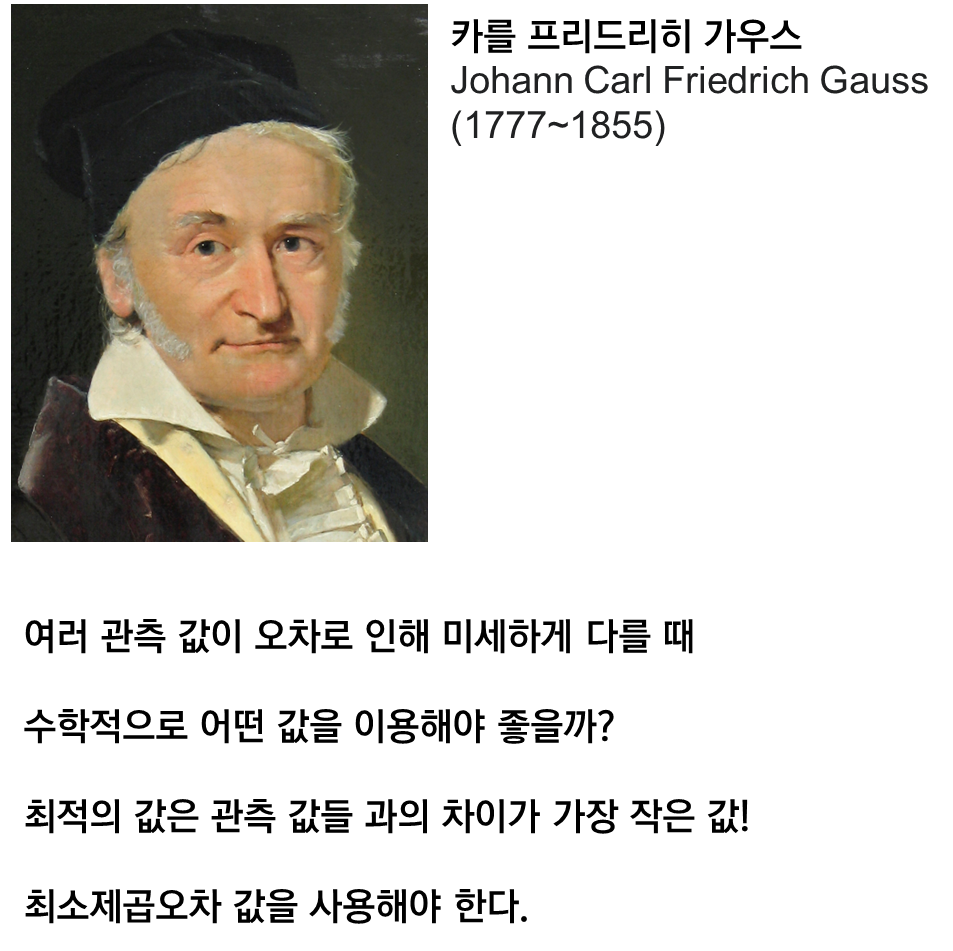

In [ ]:
from ipywidgets import interact, IntSlider
from IPython.display import display

def calculate_sse(a):
    """
    Calculates the Sum of Squared Errors for a given value 'a'.

    Args:
        a (int): The value for which to calculate SSE.

    Returns:
        float: The Sum of Squared Errors.
    """
    # Assuming 'data' DataFrame and '거래가' column are available
    if '거래가' in data.columns:
        errors = data['거래가'] - a
        sse = np.sum(errors**2)
        print(f"Sum of Squared Errors for a = {a:,}: {sse:,.2f}")
    else:
        print("Error: '거래가' column not found in the DataFrame.")

# Create an interactive slider for 'a'
interact(calculate_sse, a=IntSlider(min=0, max=500000, step=1000, description='Value of a (in 10k won):'));

In [ ]:
# Define a range of 'a' values
a_values = np.linspace(0, 500000, 1000) # From 0 to 500,000 in steps of 1000

# Calculate SSE for each 'a' value
sse_values = [np.sum((data['거래가'] - a)**2) for a in a_values]

# Find the value of 'a' that minimizes SSE (which is the mean)
mean_value = data['거래가'].mean()
min_sse = np.min(sse_values)

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(a_values, sse_values, label='SSE vs a')

# Add a vertical line at the mean
plt.axvline(mean_value, color='red', linestyle='--', label=f'Mean ({mean_value:,.2f})')

# Add points at 5억 (500,000) intervals
point_values = np.arange(0, 500001, 50000) # 5억 in 10k won units is 50000
point_sse = [np.sum((data['거래가'] - a)**2) for a in point_values]
plt.scatter(point_values, point_sse, color='purple', zorder=5, label='Points at 5억 intervals')

# Add a red point at the mean
plt.scatter(mean_value, min_sse, color='red', zorder=5, label='Mean (Min SSE)')


# Add labels and title
plt.xlabel('Value of a (만원)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('SSE vs a with Mean and 5억 Intervals')
plt.legend()
plt.grid(True)

plt.show()

# Total Sum of Squares (TSS)

In [ ]:
sub_data = data.copy()

In [ ]:
# 앞에 50개 데이터 추출
data_50 = sub_data['거래가']

# 선 그래프 그리기
plt.plot(data_50.index, data_50.values)

# 평균값 계산
mean_value = sub_data['거래가'].mean()

# 평균선 그리기
plt.axhline(mean_value, color='blue', linestyle='--', label='Mean')

# 평균과 데이터 사이를 붉은색으로 채우기
plt.fill_between(data_50.index, data_50.values, mean_value, color='red', alpha=0.2)

# 범례 표시
plt.legend()

# 그래프 표시
plt.show()


In [ ]:
# prompt: sub_data['거래가']의 평균대비 잔차의 TSS 를 구해서 표시해줘

# 평균값 계산
mean_value = sub_data['거래가'].mean()

# 잔차 계산
residuals = sub_data['거래가'] - mean_value

# TSS 계산
TSS = np.sum(residuals ** 2)

# 결과 출력
print("TSS:", format(TSS, ","))


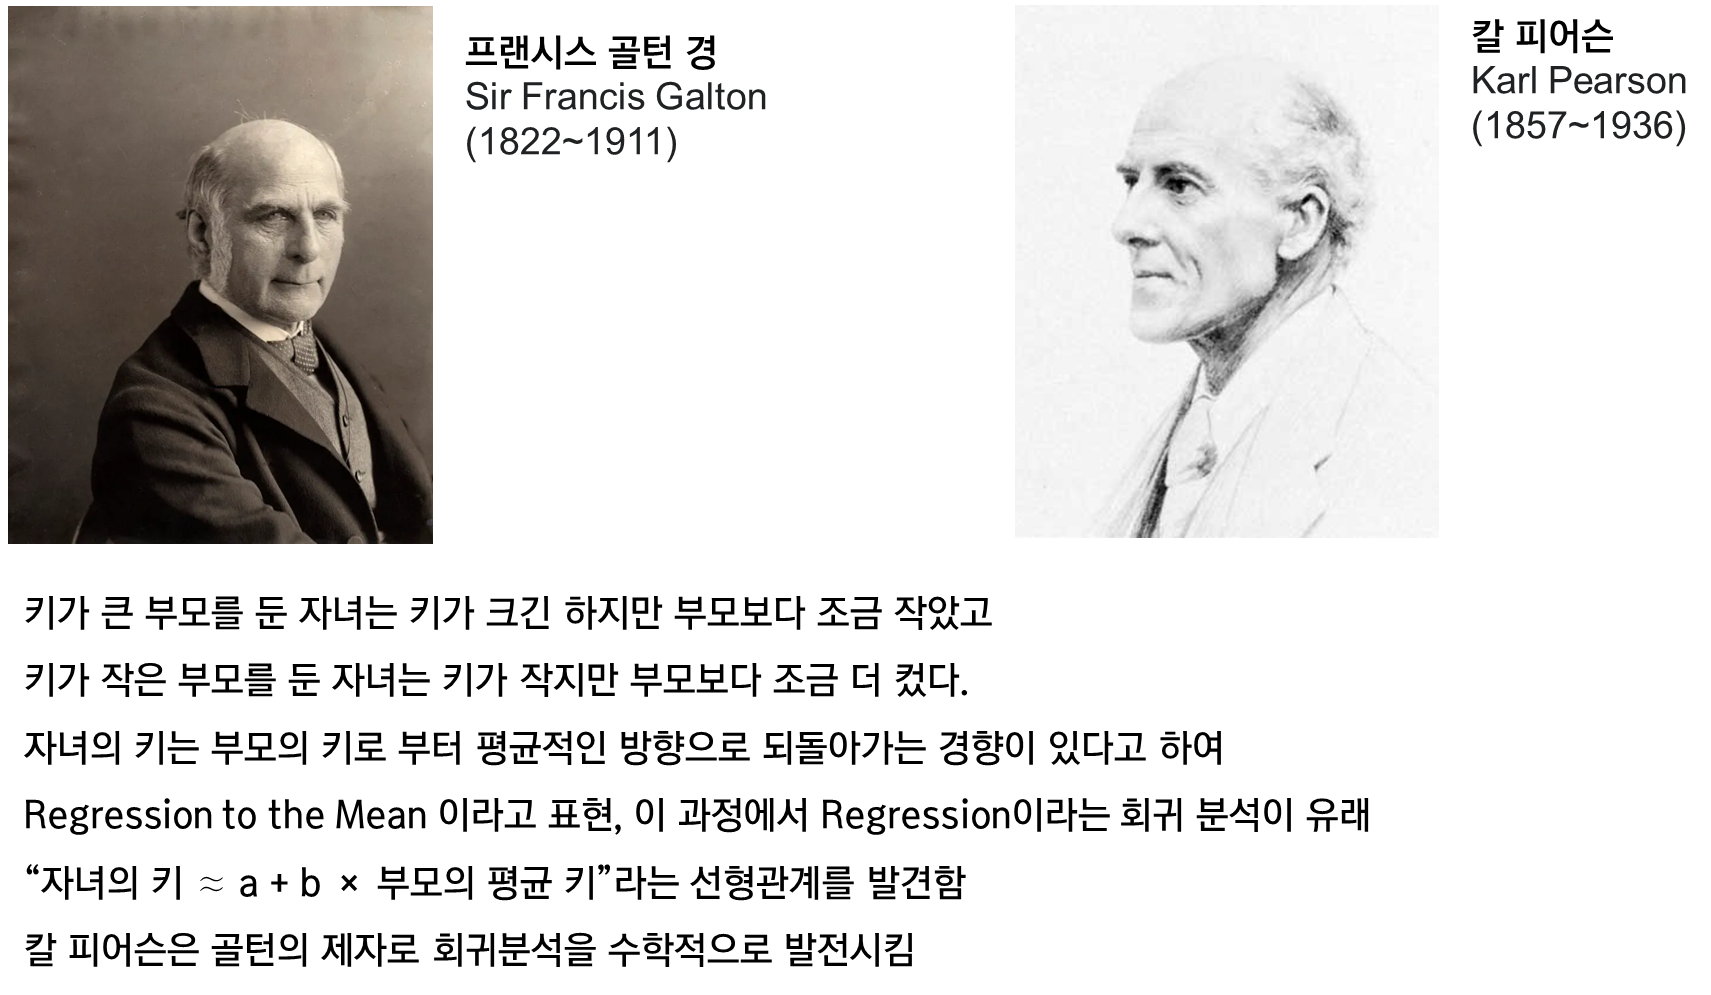

#  
# **정보가 추가된다면?**


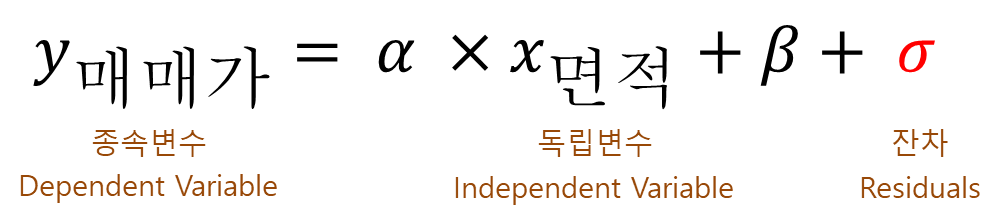

In [ ]:
sub_data = sub_data.rename(columns={'전용면적(㎡)':'면적'})
sub_data['면적'] = sub_data['면적'].astype('float')
sub_data.dtypes

In [ ]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Prepare the data for the model
# Assuming 'sub_data' DataFrame is available and '면적' is already converted to numeric
X = np.array(sub_data['면적'].values).reshape(-1, 1)
Y = np.array(sub_data['거래가'].values)

# Create and fit the linear regression model
lm = LinearRegression()
lm.fit(X, Y)

# Predict Y values using the fitted model
Y_hat = lm.predict(X)

# Get the coefficient and intercept
coefficient = lm.coef_[0]
intercept = lm.intercept_

# Create the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(X, Y, label='Actual Data')

# Plot the regression line
plt.plot(X, Y_hat, color='red', linestyle='--', label=f'Regression Line (y = {coefficient:.2f}x + {intercept:.2f})')

# Add labels and title
plt.xlabel('면적(㎡)')
plt.ylabel('거래가 (만원)')
plt.title('전용면적 vs 거래가 with Regression Line')
plt.legend()
plt.grid(True)
plt.show()

# Print the regression equation
print(f"Regression Equation: 거래가 = {coefficient:.2f} * 면적 + {intercept:.2f}")

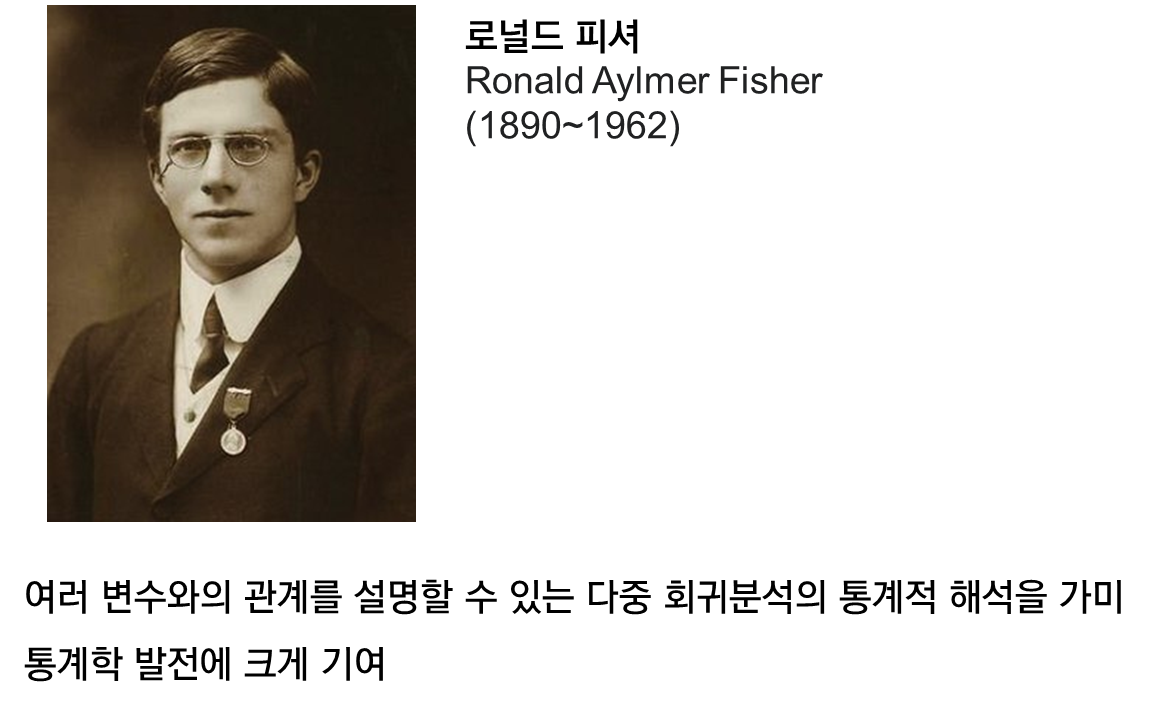

In [ ]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np

# Prepare data for the first plot (Price vs Area)
X1 = np.array(sub_data['면적'].values).reshape(-1, 1)
Y = np.array(sub_data['거래가'].values)

# Create and fit the linear regression model for the first plot
lm1 = LinearRegression()
lm1.fit(X1, Y)
Y_hat1 = lm1.predict(X1)
coefficient1 = lm1.coef_[0]
intercept1 = lm1.intercept_

# Prepare data for the second plot (Price vs Year Built)
# Convert '건축년도' to numeric, coercing errors
X2 = np.array(sub_data['건축년도'].astype(float).values).reshape(-1, 1)

# Create and fit the linear regression model for the second plot
lm2 = LinearRegression()
lm2.fit(X2, Y)
Y_hat2 = lm2.predict(X2)
coefficient2 = lm2.coef_[0]
intercept2 = lm2.intercept_

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot the first scatter plot with regression line
axes[0].scatter(X1, Y, label='Actual Data')
axes[0].plot(X1, Y_hat1, color='red', linestyle='--', label=f'y = {coefficient1:.2f}x + {intercept1:.2f}')
axes[0].set_xlabel('면적(㎡)')
axes[0].set_ylabel('거래가 (만원)')
axes[0].set_title('전용면적 vs 거래가 with Regression Line')
axes[0].legend()
axes[0].grid(True)

# Plot the second scatter plot with regression line
axes[1].scatter(X2, Y, label='Actual Data')
axes[1].plot(X2, Y_hat2, color='red', linestyle='--', label=f'y = {coefficient2:.2f}x + {intercept2:.2f}')
axes[1].set_xlabel('건축년도')
axes[1].set_ylabel('거래가 (만원)')
axes[1].set_title('건축년도 vs 거래가 with Regression Line')
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()

# Print the regression equations
print(f"Regression Equation (Price vs Area): 거래가 = {coefficient1:.2f} * 면적 + {intercept1:.2f}")
print(f"Regression Equation (Price vs Year Built): 거래가 = {coefficient2:.2f} * 건축년도 + {intercept2:.2f}")

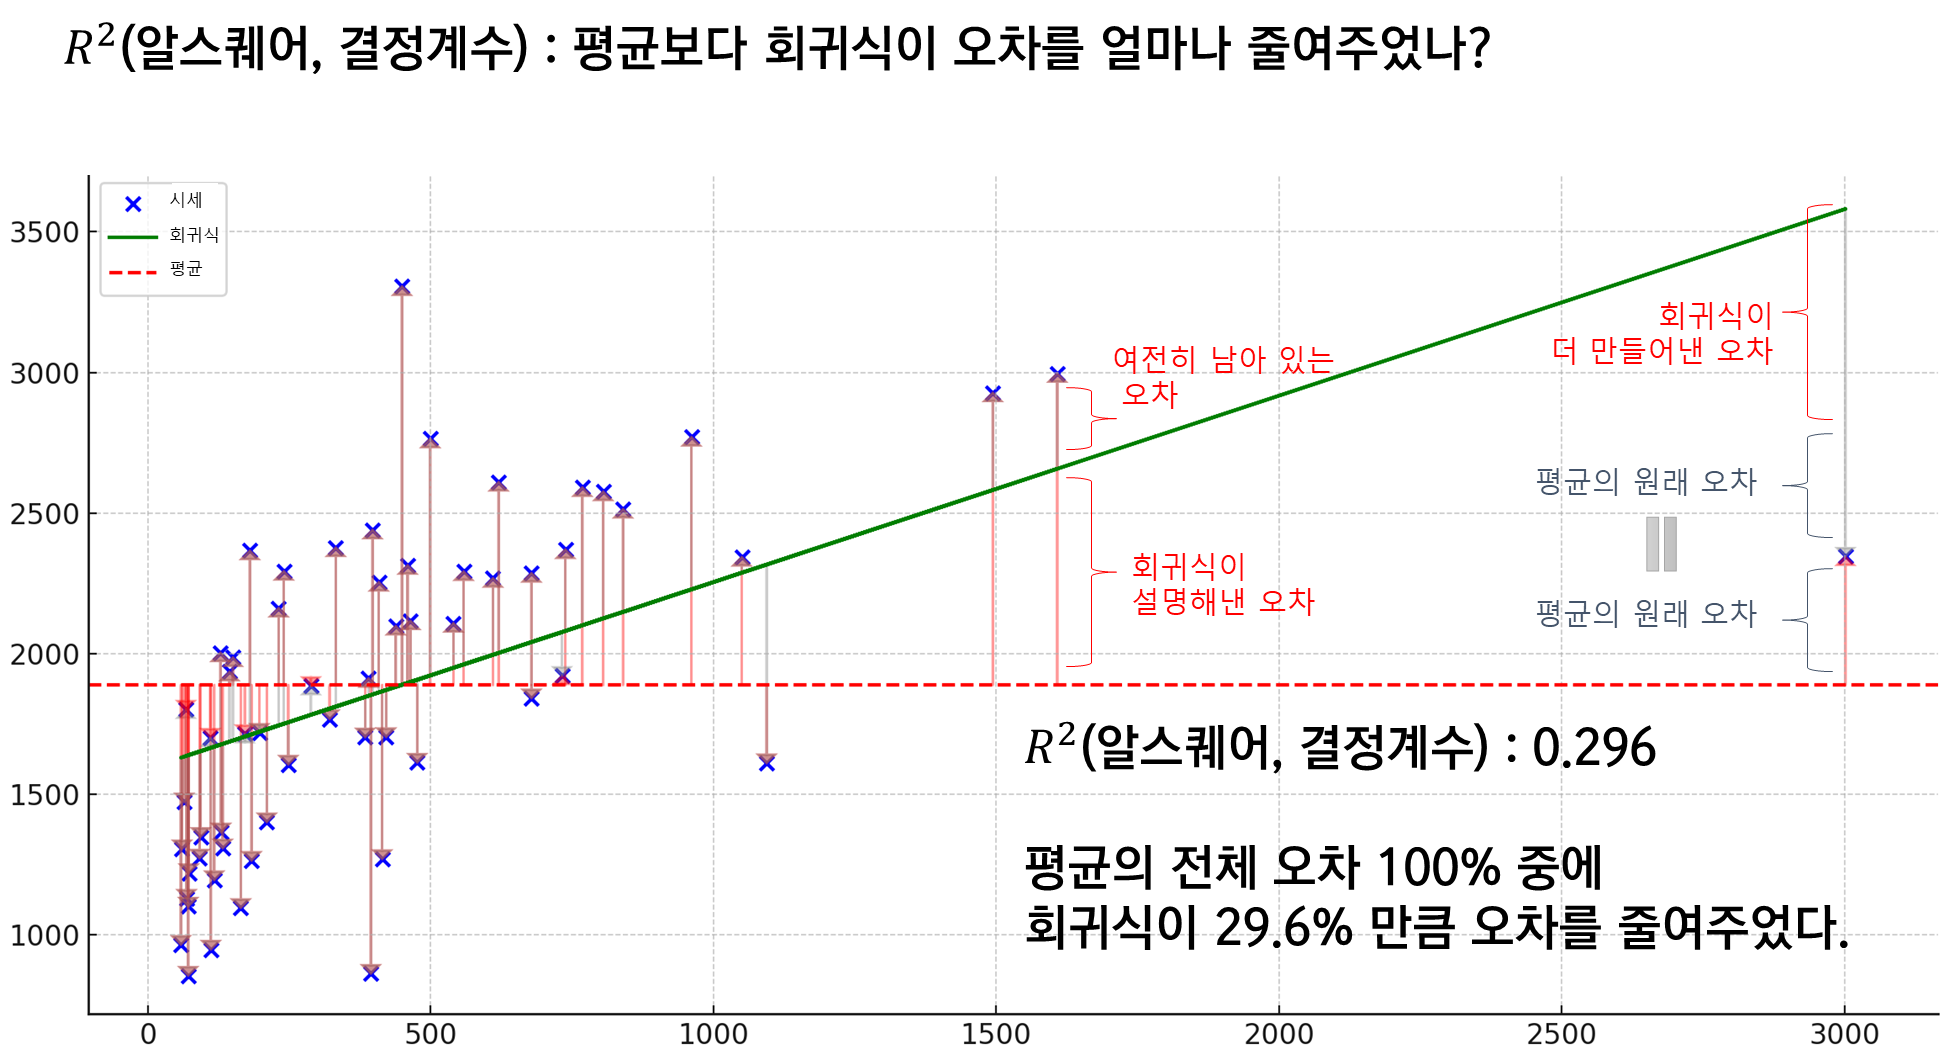

# Sum of Squares of Residuals (RSS)

In [ ]:
# 예측값 계산
Y_hat = lm.predict(X)

# 앞에 50개 데이터 추출
data_50 = sub_data['거래가'].head(50)
pred_50 = Y_hat[:50]

# 선 그래프 그리기
plt.plot(data_50.index, data_50.values, label='real')
plt.plot(data_50.index, pred_50, label='predict')


# 평균과 데이터 사이를 붉은색으로 채우기
plt.fill_between(data_50.index, data_50.values, pred_50, color='red', alpha=0.2)

# 범례 표시
plt.legend()

# 그래프 표시
plt.show()

In [ ]:
# 잔차 계산
residuals = Y - Y_hat

# 잔차의 히스토그램
plt.hist(residuals, bins=100)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()


In [ ]:
# 예측값 계산
Y_hat = lm.predict(X)

# 앞에 50개 데이터 추출
data_50 = sub_data['거래가'].head(50)
pred_50 = Y_hat[:50]

# 선 그래프 그리기
plt.plot(data_50.index, data_50.values, label='real')
plt.plot(data_50.index, pred_50, label='predict')

# 평균값 계산
mean_value = sub_data['거래가'].mean()

# 평균선 그리기
plt.axhline(mean_value, color='green', linestyle='--', label='Mean')

# 평균과 데이터 사이를 붉은색으로 채우기
plt.fill_between(data_50.index, data_50.values, pred_50, color='red', alpha=0.2)

# 평균과 실제값의 차이를 파란색으로 표기
plt.fill_between(data_50.index, data_50.values, mean_value, color='green', alpha=0.2)

# 범례 표시
plt.legend()

# 그래프 표시
plt.show()

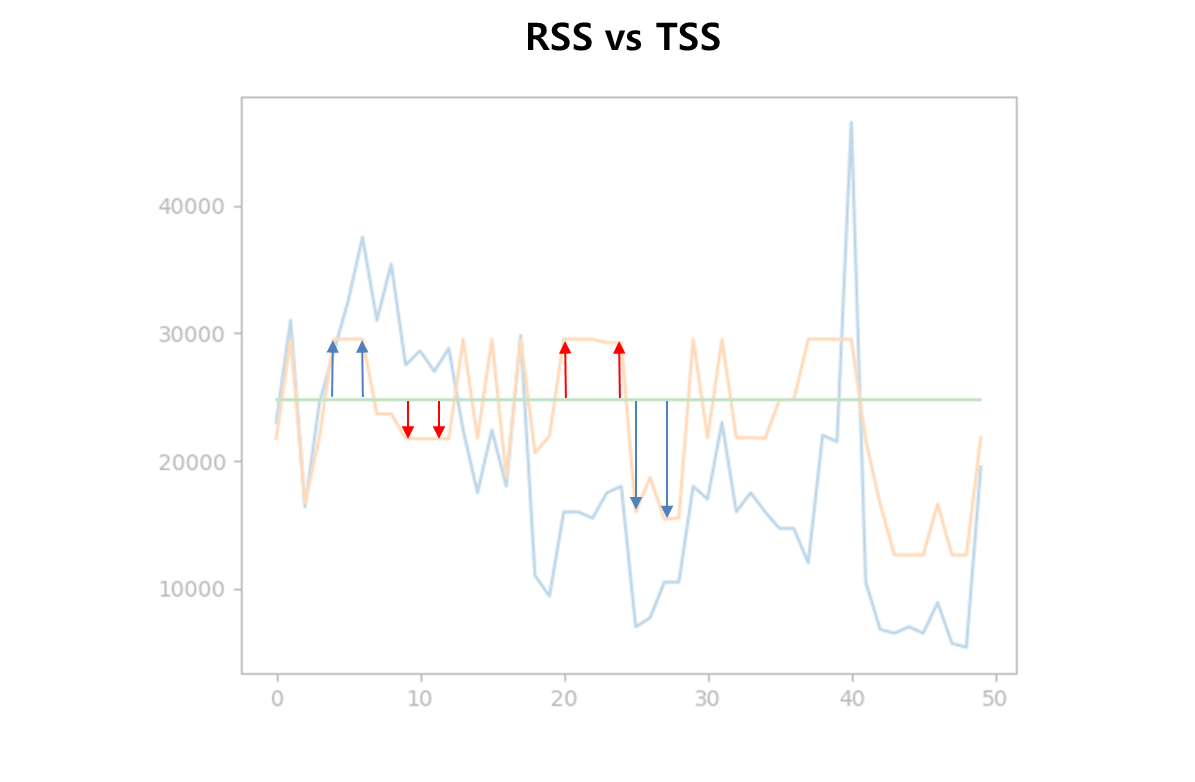

# **R square**

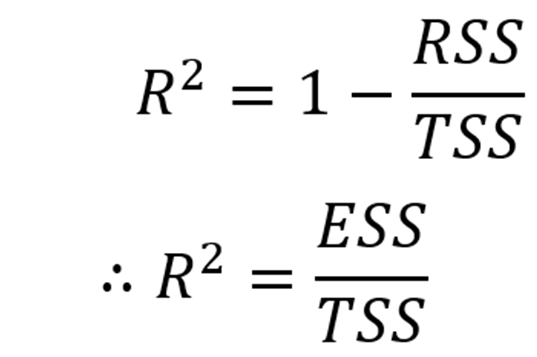

In [ ]:
from sklearn.metrics import r2_score

# TSS 계산
y_mean = np.mean(Y)
TSS = np.sum((Y - y_mean)**2)

# RSS 계산
y_pred = lm.predict(X)
RSS = np.sum((Y - y_pred)**2)

# R-squared 계산
r_squared = 1 - (RSS / TSS)

# 차트 제목 설정
plt.title(f'R-squared: {r_squared:.4f}')

# 나머지 코드는 동일하게 유지

# 예측값 계산
Y_hat = lm.predict(X)

# 앞에 50개 데이터 추출
data_50 = sub_data['거래가'].head(50)
pred_50 = Y_hat[:50]

# 선 그래프 그리기
plt.plot(data_50.index, data_50.values, label='real')
plt.plot(data_50.index, pred_50, label='predict')

# 평균값 계산
mean_value = sub_data['거래가'].mean()

# 평균선 그리기
plt.axhline(mean_value, color='green', linestyle='--', label='Mean')

# 평균과 데이터 사이를 붉은색으로 채우기
plt.fill_between(data_50.index, data_50.values, pred_50, color='red', alpha=0.2)

# 평균과 실제값의 차이를 파란색으로 표기
plt.fill_between(data_50.index, data_50.values, mean_value, color='green', alpha=0.2)

# 범례 표시
plt.legend()

# 그래프 표시
plt.show()

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# TSS 계산
y_mean = np.mean(Y)
TSS = np.sum((Y - y_mean)**2)

# RSS 계산
y_pred = lm.predict(X)
RSS = np.sum((Y - y_pred)**2)

# R-squared 계산 (공식)
r_squared_formula = 1 - (RSS / TSS)

# R-squared 계산 (scikit-learn)
r_squared_sklearn = r2_score(Y, y_pred)
r_squared_sklearn_v1 = r_squared_sklearn

# 차이 출력
print(f"R-squared (공식): {r_squared_formula:.4f}")
print(f"R-squared (scikit-learn): {r_squared_sklearn:.4f}")
print(f"차이: {abs(r_squared_formula - r_squared_sklearn):.6f}")

In [ ]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score

# Prepare data for the first plot (Price vs Area)
X1 = np.array(sub_data['면적'].values).reshape(-1, 1)
Y = np.array(sub_data['거래가'].values)

# Create and fit the linear regression model for the first plot
lm1 = LinearRegression()
lm1.fit(X1, Y)
Y_hat1 = lm1.predict(X1)
coefficient1 = lm1.coef_[0]
intercept1 = lm1.intercept_
r2_1 = r2_score(Y, Y_hat1)

# Prepare data for the second plot (Price vs Year Built)
# Convert '건축년도' to numeric, coercing errors
X2 = np.array(sub_data['건축년도'].astype(float).values).reshape(-1, 1)

# Create and fit the linear regression model for the second plot
lm2 = LinearRegression()
lm2.fit(X2, Y)
Y_hat2 = lm2.predict(X2)
coefficient2 = lm2.coef_[0]
intercept2 = lm2.intercept_
r2_2 = r2_score(Y, Y_hat2)


# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot the first scatter plot with regression line
axes[0].scatter(X1, Y, label='Actual Data')
axes[0].plot(X1, Y_hat1, color='red', linestyle='--', label=f'y = {coefficient1:.2f}x + {intercept1:.2f}')
axes[0].set_xlabel('면적(㎡)')
axes[0].set_ylabel('거래가 (만원)')
axes[0].set_title(f'전용면적 vs 거래가 (R-squared: {r2_1:.4f})', fontsize=14, fontweight='bold') # Added R-squared to title
axes[0].legend()
axes[0].grid(True)

# Plot the second scatter plot with regression line
axes[1].scatter(X2, Y, label='Actual Data')
axes[1].plot(X2, Y_hat2, color='red', linestyle='--', label=f'y = {coefficient2:.2f}x + {intercept2:.2f}')
axes[1].set_xlabel('건축년도')
axes[1].set_ylabel('거래가 (만원)')
axes[1].set_title(f'건축년도 vs 거래가 (R-squared: {r2_2:.4f})', fontsize=14, fontweight='bold') # Added R-squared to title
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()

# Print the regression equations
print(f"Regression Equation (Price vs Area): 거래가 = {coefficient1:.2f} * 면적 + {intercept1:.2f}")
print(f"Regression Equation (Price vs Year Built): 거래가 = {coefficient2:.2f} * 건축년도 + {intercept2:.2f}")
print(f"R-squared (Price vs Area): {r2_1:.4f}")
print(f"R-squared (Price vs Year Built): {r2_2:.4f}")

# **데이터가 추가되면 설명력이 올라가네!**

# **그렇다면 정보를 더 주면 좋은 모델이 되겠구나**

In [ ]:
sub_data['건축년도'] = sub_data['건축년도'].astype(int)
sub_data['연한'] = sub_data['건축년도'].apply(lambda x : 2024 - x)
sub_data[['건축년도', '연한']].head(100)

In [ ]:
sub_data['연한'].describe()

In [ ]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np

# Prepare data for multiple linear regression (Area and Age)
X_multi = np.array(sub_data[['면적', '연한']].values)
Y = np.array(sub_data['거래가'].values)

# Create and fit the multiple linear regression model
lm_multi = LinearRegression()
lm_multi.fit(X_multi, Y)
Y_hat_multi = lm_multi.predict(X_multi)

# Prepare data for simple linear regression (Area only)
X_simple = np.array(sub_data['면적'].values).reshape(-1, 1)

# Create and fit the simple linear regression model
lm_simple = LinearRegression()
lm_simple.fit(X_simple, Y)
Y_hat_simple = lm_simple.predict(X_simple)


# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(X_simple, Y, label='Actual Data')
plt.plot(X_simple, Y_hat_simple, color='orange', linestyle='-', linewidth=1, label='Simple Regression (Area)') # Changed to thin solid line
plt.scatter(X_simple, Y_hat_multi, color='red', alpha=0.7, label='Multiple Regression (Area, Age)') # Kept as red dots


# Add labels and title
plt.xlabel('면적(㎡)')
plt.ylabel('거래가 (만원)')
plt.title('Actual vs Predicted Transaction Prices (Simple vs Multiple Regression)')
plt.legend()
plt.grid(True)
plt.show()

# Print regression equations (optional)
print(f"Simple Regression Equation (Area): 거래가 = {lm_simple.coef_[0]:.2f} * 면적 + {lm_simple.intercept_:.2f}")
print(f"Multiple Regression Equation (Area, Age): 거래가 = {lm_multi.coef_[0]:.2f} * 면적 + {lm_multi.coef_[1]:.2f} * 연한 + {lm_multi.intercept_:.2f}")

In [ ]:
from sklearn.metrics import r2_score

# Calculate R-squared for the simple linear regression model (Area only)
# Assuming X_simple and Y are available from the previous simple regression analysis
# If not, recalculate:
X_simple = np.array(sub_data['면적'].values).reshape(-1, 1)
Y = np.array(sub_data['거래가'].values)
lm_simple = LinearRegression()
lm_simple.fit(X_simple, Y)
Y_hat_simple = lm_simple.predict(X_simple)
r_squared_simple = r2_score(Y, Y_hat_simple)

# Calculate R-squared for the multiple linear regression model (Area and Age)
# Assuming X_multi and Y are available from the previous multiple regression analysis
# If not, recalculate:
X_multi = np.array(sub_data[['면적', '연한']].values)
Y = np.array(sub_data['거래가'].values)
lm_multi = LinearRegression()
lm_multi.fit(X_multi, Y)
Y_hat_multi = lm_multi.predict(X_multi)
r_squared_multi = r2_score(Y, Y_hat_multi)


# Print the R-squared values and the difference
print(f"R-squared (Simple Regression - Area only): {r_squared_simple:.4f}")
print(f"R-squared (Multiple Regression - Area and Age): {r_squared_multi:.4f}")
print(f"Increase in R-squared by adding '연한': {r_squared_multi - r_squared_simple:.4f}")

In [ ]:
sub_data['층'] = sub_data['층'].astype(int)
sub_data['층'].describe()

In [ ]:
sub_data.columns.values

In [ ]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score

# Prepare data for multiple linear regression (Area, Age, and Floor)
X_multi_3vars = np.array(sub_data[['면적', '연한', '층']].values)
Y = np.array(sub_data['거래가'].values)

# Create and fit the multiple linear regression model with 3 variables
lm_multi_3vars = LinearRegression()
lm_multi_3vars.fit(X_multi_3vars, Y)
Y_hat_multi_3vars = lm_multi_3vars.predict(X_multi_3vars)
r2_multi_3vars = r2_score(Y, Y_hat_multi_3vars)

# Prepare data for simple linear regression (Area only)
X_simple = np.array(sub_data['면적'].values).reshape(-1, 1)

# Create and fit the simple linear regression model
lm_simple = LinearRegression()
lm_simple.fit(X_simple, Y)
Y_hat_simple = lm_simple.predict(X_simple)
r2_simple = r2_score(Y, Y_hat_simple)

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(X_simple, Y, label='Actual Data')
plt.plot(X_simple, Y_hat_simple, color='orange', linestyle='-', linewidth=1, label='Simple Regression (Area)')
plt.scatter(X_simple, Y_hat_multi_3vars, color='red', alpha=0.7, label='Multiple Regression (Area, Age, Floor)')


# Add labels and title
plt.xlabel('면적(㎡)')
plt.ylabel('거래가 (만원)')
plt.title('Actual vs Predicted Transaction Prices (Simple vs Multiple Regression with 3 variables)')
plt.legend()
plt.grid(True)
plt.show()

# Print regression equations and R-squared values
print(f"Simple Regression Equation (Area): 거래가 = {lm_simple.coef_[0]:.2f} * 면적 + {lm_simple.intercept_:.2f}")
print(f"R-squared (Simple Regression - Area only): {r2_simple:.4f}")
print("-" * 30)
print(f"Multiple Regression Equation (Area, Age, Floor): 거래가 = {lm_multi_3vars.coef_[0]:.2f} * 면적 + {lm_multi_3vars.coef_[1]:.2f} * 연한 + {lm_multi_3vars.coef_[2]:.2f} * 층 + {lm_multi_3vars.intercept_:.2f}")
print(f"R-squared (Multiple Regression - Area, Age, Floor): {r2_multi_3vars:.4f}")

In [ ]:
import statsmodels.api as sm

# Prepare data for multiple linear regression (Area, Age, and Floor)
X_multi_3vars = sub_data[['면적', '연한', '층']]
Y = sub_data['거래가']

# Add a constant to the independent variables for the intercept
X_multi_3vars = sm.add_constant(X_multi_3vars)

# Create and fit the OLS model
model = sm.OLS(Y, X_multi_3vars)
results = model.fit()

# Print the statistical summary
print(results.summary())

In [ ]:
# prompt: X에서 사용된 독립변수들의 다중공선성을 테스트 해줘

from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

# Prepare the independent variables from the DataFrame
X_vif = sub_data[['면적', '연한', '층']]

# Add a constant to the independent variables for accurate VIF calculation
X_vif = sm.add_constant(X_vif)

# 다중공선성 확인
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]
vif["features"] = X_vif.columns
print(vif)



## 1. 기본 아이디어

* 다중공선성은 **하나의 독립변수가 다른 독립변수들과 얼마나 선형적으로 설명될 수 있는지**를 보는 개념입니다.
* 즉, 특정 변수 $X_i$가 나머지 변수들의 선형결합으로 잘 설명된다면, 그 변수는 다른 변수와 중복된 정보를 많이 담고 있다는 의미 → 다중공선성 존재.

---

## 2. 계산 공식

VIF는 다음과 같이 정의됩니다:

$$
VIF_i = \frac{1}{1 - R_i^2}
$$

* $R_i^2$: 변수 $X_i$를 종속변수로 하고, 나머지 모든 독립변수를 설명변수로 두어 회귀분석 했을 때의 결정계수.

즉,

1. 각 독립변수 $X_i$를 대상으로,
2. 나머지 변수들을 이용해 회귀식을 만듦,
3. 그 회귀의 $R^2$ 값을 구한 후,
4. 위 식에 대입하여 VIF를 계산.

---

## 3. 직관적 해석

* $R_i^2$가 높을수록 (즉, 다른 변수로 $X_i$를 잘 설명할수록) → 분모 $(1 - R_i^2)$가 작아짐 → VIF가 커짐.
* VIF가 크다는 건 그 변수는 다른 변수와 강하게 선형적으로 연결되어 있다는 뜻.

예시:

* $R_i^2 = 0.0$ → $VIF = 1.0$ (다중공선성 전혀 없음)
* $R_i^2 = 0.8$ → $VIF = 5.0$
* $R_i^2 = 0.9$ → $VIF = 10.0$ (심각한 다중공선성)

---

## 4. 계산 절차 예시

예를 들어 독립변수가 \[면적, 연한, 층] 세 개일 때:

1. 면적을 종속변수, \[연한, 층]을 독립변수로 회귀 → $R^2_{면적}$ 구함
2. 연한을 종속변수, \[면적, 층]을 독립변수로 회귀 → $R^2_{연한}$ 구함
3. 층을 종속변수, \[면적, 연한]을 독립변수로 회귀 → $R^2_{층}$ 구함
4. 각각 VIF 계산:

   $$
   VIF_{면적} = \frac{1}{1 - R^2_{면적}}, \quad
   VIF_{연한} = \frac{1}{1 - R^2_{연한}}, \quad
   VIF_{층} = \frac{1}{1 - R^2_{층}}
   $$

---

👉 정리하면, **VIF는 "한 변수가 다른 변수로 얼마나 잘 설명되는지"를 수치화한 값이며, $1 / (1 - R^2)$로 계산합니다.**

---

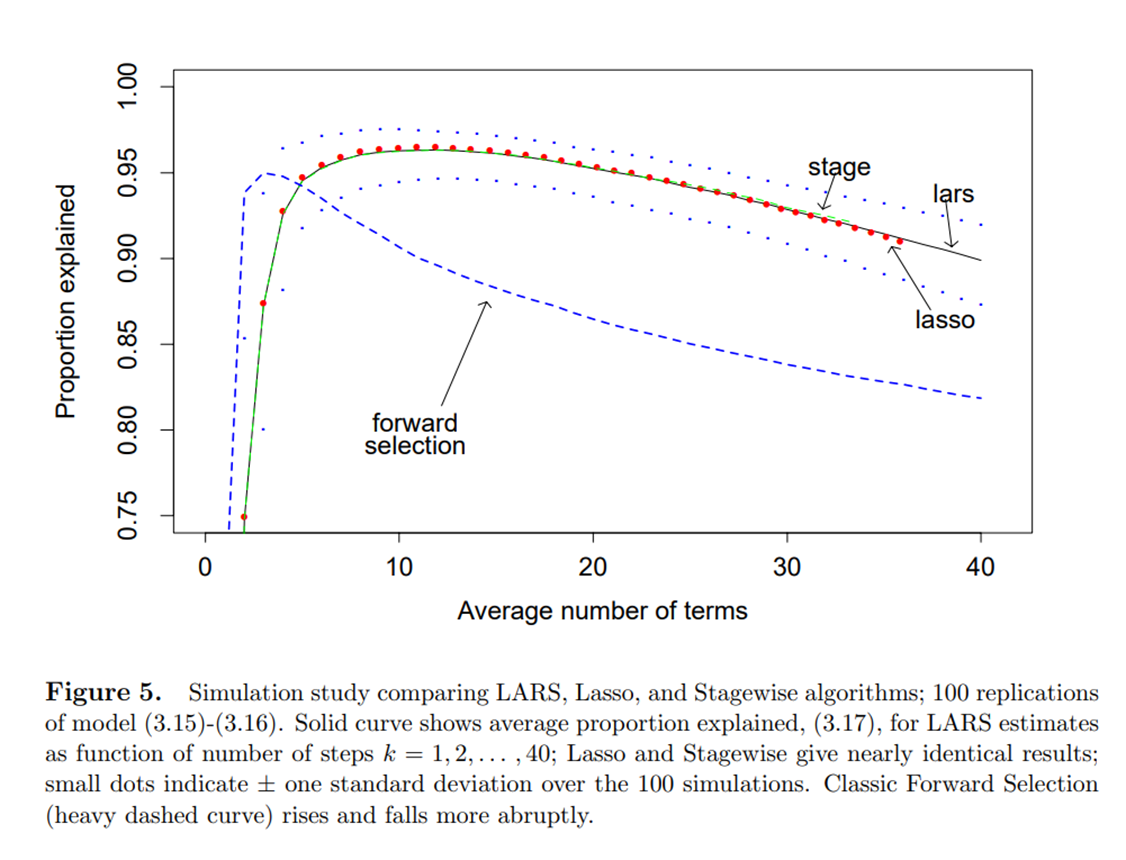

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import numpy as np

# Prepare data
X = sub_data[['연한']] # Keep X as a DataFrame for feature names
Y = sub_data['거래가']

# Linear Regression (1st order polynomial)
lm_linear = LinearRegression()
lm_linear.fit(X, Y)
Y_hat_linear = lm_linear.predict(X)
r2_linear = r2_score(Y, Y_hat_linear)

# Polynomial Regression (2nd order polynomial)
poly_features = PolynomialFeatures(degree=2)
X_poly = poly_features.fit_transform(X) # X is a DataFrame, so fit_transform uses feature names

lm_poly = LinearRegression()
lm_poly.fit(X_poly, Y)
Y_hat_poly = lm_poly.predict(X_poly)
r2_poly = r2_score(Y, Y_hat_poly)

# Sort the data for plotting the polynomial curve smoothly
X_sort = np.sort(X.values, axis=0) # Sort the values, not the DataFrame
X_sort_poly = poly_features.transform(X_sort) # Transform the sorted values
Y_hat_poly_sort = lm_poly.predict(X_sort_poly)


# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(X, Y, label='Actual Data')

# Plot the linear regression line
plt.plot(X, Y_hat_linear, color='orange', linestyle='-', label=f'Linear Regression (R-squared: {r2_linear:.4f})')

# Plot the polynomial regression line
plt.plot(X_sort, Y_hat_poly_sort, color='red', linestyle='-', label=f'Polynomial Regression (Degree 2) (R-squared: {r2_poly:.4f})')


# Add labels and title
plt.xlabel('연한')
plt.ylabel('거래가 (만원)')
plt.title('연한 vs 거래가 with Linear and Polynomial Regression')
plt.legend()
plt.grid(True)
plt.show()

# Print regression equations
print(f"Linear Regression Equation: 거래가 = {lm_linear.coef_[0]:.2f} * 연한 + {lm_linear.intercept_:.2f}")
# Note: coef_[0] is for the constant term, coef_[1] for 연한, coef_[2] for 연한^2
print(f"Polynomial Regression Equation (Degree 2): 거래가 = {lm_poly.coef_[2]:.2f} * 연한^2 + {lm_poly.coef_[1]:.2f} * 연한 + {lm_poly.intercept_:.2f}")